# TASK 5: BUSINESS ANALYTICS

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("SampleSuperstore.csv")

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [32]:
profit=df.groupby("State")["Profit"].sum()
sales=df.groupby("State")["Sales"].sum()
region=df.groupby("State")["Region"].max()

city=df.groupby("Region")["State"].max()

,,Profit,Sales
State,Region,,
Alabama,South,5786.8253,19510.6400
Arizona,West,-3427.9246,35282.0010
Arkansas,South,4008.6871,11678.1300
California,West,76381.3871,457687.6315
Colorado,West,-6527.8579,32108.1180
Connecticut,East,3511.4918,13384.3570
Delaware,East,9977.3748,27451.0690
District of Columbia,East,1059.5893,2865.0200
Florida,South,-3399.3017,89473.7080


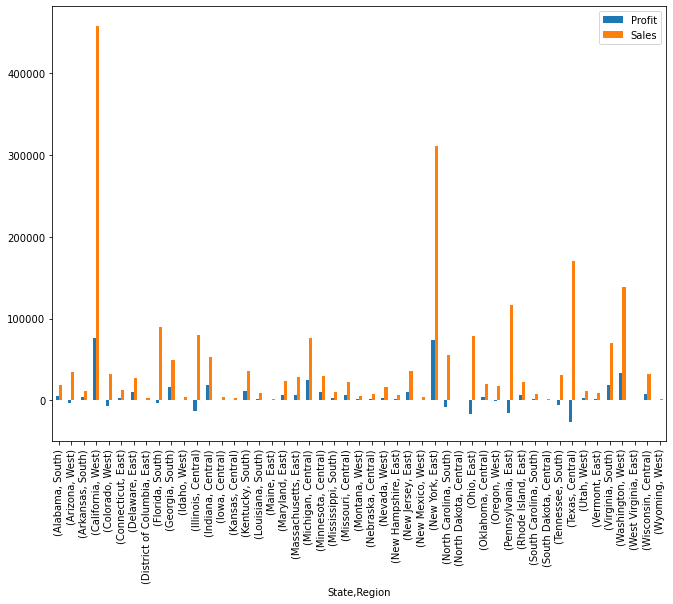

In [33]:
df2=pd.concat([profit,sales,region],axis=1)
df2.set_index([df2.index,"Region"],inplace=True)
df2.plot(kind="bar")

plt.gcf().set_size_inches(11,8)
df2

# Region-wise profit analysis

Region
Central     7.921629
East       13.483399
South      11.934342
West       14.944831
dtype: float64

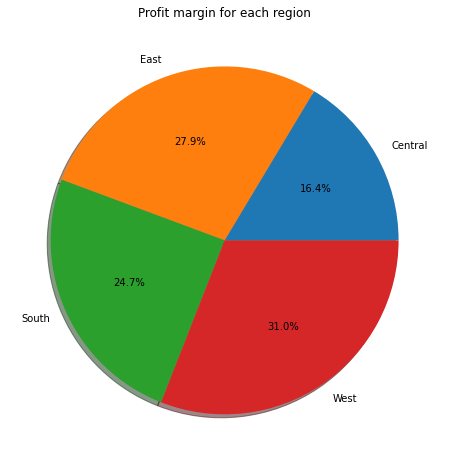

In [7]:
data=((df.groupby("Region")["Profit"].sum()/df.groupby("Region")["Sales"].sum())*100)
plt.pie(data.values,labels=data.index,autopct='%1.1f%%',shadow=True) 
plt.gcf().set_size_inches(8,8)
plt.gca().set_title("Profit margin for each region")
data

# State-wise business profit analysis:
To find which states are earning maximum or minimum  or no profit

State                 Region 
Ohio                  East      -21.686405
Colorado              West      -20.330864
Tennessee             South     -17.421289
Illinois              Central   -15.727205
Texas                 Central   -15.118192
North Carolina        South     -13.472097
Pennsylvania          East      -13.354823
Arizona               West       -9.715789
Oregon                West       -6.829558
Florida               South      -3.799219
Wyoming               West        6.250000
West Virginia         East       15.367657
California            West       16.688541
Idaho                 West       18.864250
Nevada                West       19.826324
South Carolina        South      20.857311
Utah                  West       22.696264
New Hampshire         East       23.400716
Massachusetts         East       23.696999
New York              East       23.816082
Louisiana             South      23.826572
Washington            West       24.092863
New Mexico            We

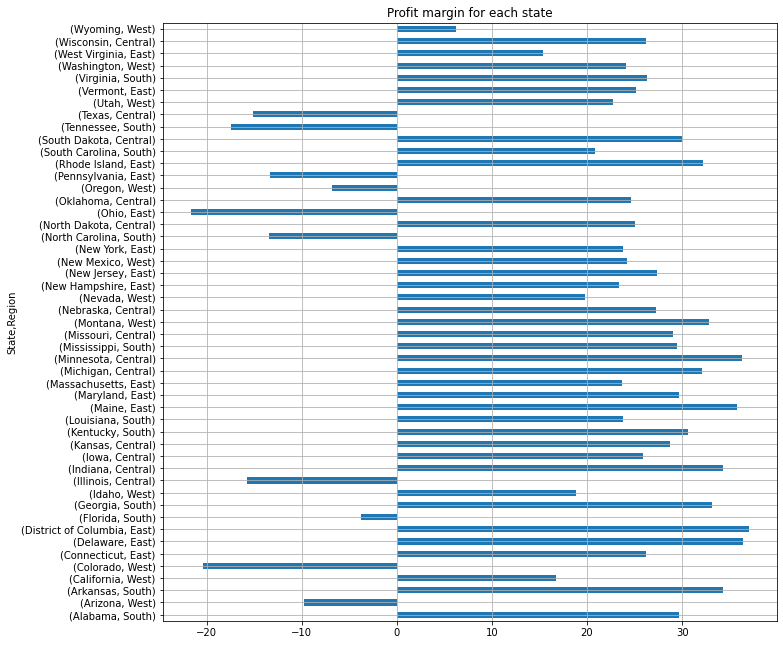

In [14]:
a=((df2["Profit"]/df2["Sales"])*100).copy()
a.plot(kind="barh")
print(a.sort_values())
plt.gcf().set_size_inches(11,11)
plt.gca().set_title("Profit margin for each state")
#The top states in the dataframe below definetly need some sort of  improved business techniques to make some profit out of them
plt.grid()

## City-wise profit analysis
Mentioned below are the cities with negative or zero profit.Thus work need to be done on these cities to earn some profit

In [9]:
profit=df.groupby("City")["Profit"].sum()
sales=df.groupby("City")["Sales"].sum()
region=df.groupby("City")["Region"].max()

city=df.groupby("City")["State"].max()
df5=pd.concat([region,city],axis=1)
df5["ProfitMargin"]=(profit/sales)*100
df5=df5[df5["ProfitMargin"]<0].copy()
#pd.set_option("display.max_rows",None)
df5.set_index(["State",df5.index,]).sort_index(level=0)[["ProfitMargin","Region"]].sort_values("ProfitMargin").head(15)

ProfitMargin   Region
State        City                                
Texas        Abilene         -270.000000  Central
             Mesquite        -168.021784  Central
Illinois     Oswego          -166.510631  Central
             Romeoville      -165.000000  Central
Texas        Missouri City   -150.000000  Central
             Deer Park       -150.000000  Central
Colorado     Littleton       -136.666667     West
Texas        Tyler           -127.794047  Central
Illinois     Champaign       -120.000000  Central
Texas        Waco             -85.810464  Central
Ohio         Elyria           -76.666667     East
Pennsylvania Lancaster        -73.185005     West
Florida      Ormond Beach     -70.000000    South
             Pensacola        -66.666667    South
Illinois     Skokie           -60.979340  Central

# Analysing the market segment-wise

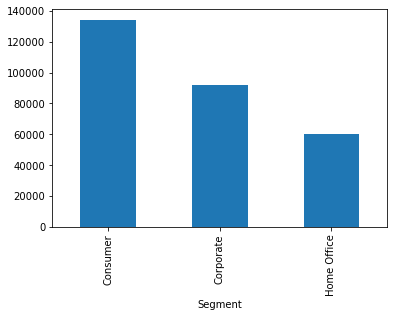

In [18]:
df.groupby("Segment").Profit.sum().plot(kind="bar")
#we see that consumers comprise of the maximum buyers

# Commodities Sales analysis

Category
Furniture           8028
Office Supplies    22906
Technology          6939
Name: Quantity, dtype: int64

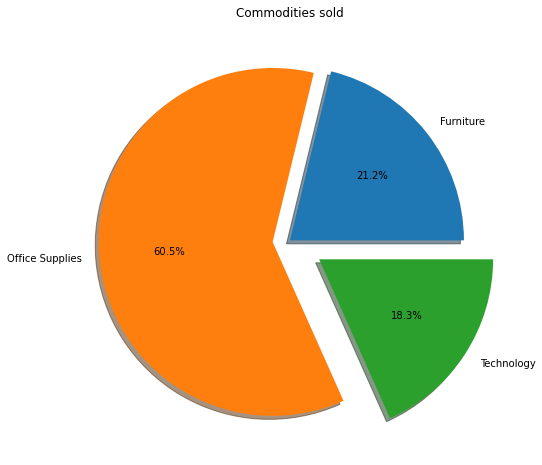

In [19]:
data=df.groupby("Category")["Quantity"].sum()
explode = (0, 0.1,0.2)
plt.pie(data.values,explode=explode,labels=data.index,autopct='%1.1f%%',shadow=True) 
plt.gcf().set_size_inches(8,8)
plt.gca().set_title("Commodities sold")
data

## Profit share of commodity of a type
to see which kind of commodity is earning the maximum profit margin in market

Text(0.5, 1.0, 'profit share of commodities of a type')

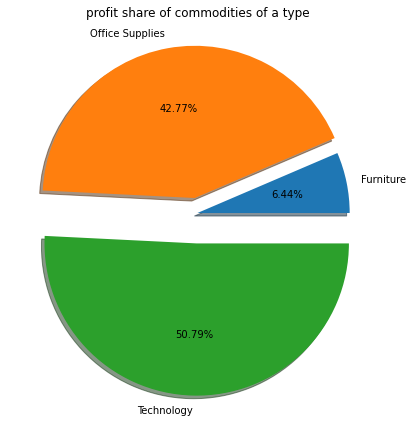

In [24]:
comodities_profit=df.groupby("Category")["Profit"].sum()
explode = (0, 0.1,0.2)
plt.pie(comodities_profit.values,explode=explode,labels=comodities_profit.index,autopct='%1.2f%%',shadow=True) 
plt.gcf().set_size_inches(7,7)
plt.gca().set_title("profit share of commodities of a type")

## Profit per commodity in market:

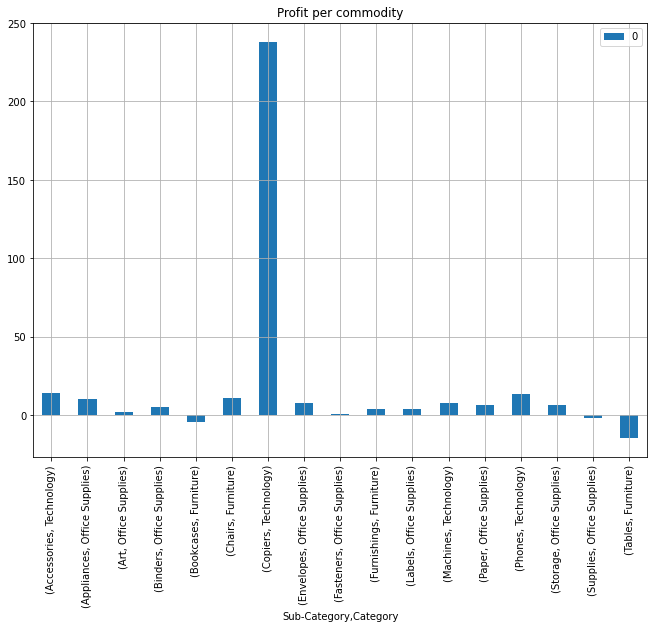

In [27]:
profit_per_commodity=(df.groupby("Sub-Category")["Profit"].sum()/df.groupby("Sub-Category")["Quantity"].sum())

pro=pd.concat([profit_per_commodity,df.groupby("Sub-Category")["Category"].max()],axis=1)
pro.set_index([pro.index,"Category"]).plot(kind="bar")
plt.gca().set_title("Profit per commodity")

plt.gcf().set_size_inches(11,8)
# we analyse that sales of furniture eg. Tables, Bookcases  must be improved to earn some profit
plt.grid()

# commodities prices analysis

In [13]:
commodities=df.groupby("Sub-Category").Sales.agg(["mean","max","min","std"])
commodities

,mean,max,min,std
Sub-Category,,,,
Accessories,215.974604,3347.370,0.990,334.965015
Appliances,230.755710,2625.120,0.444,388.949643
Art,34.068834,1113.024,1.344,60.122465
Binders,133.560560,9892.740,0.556,563.251188
Bookcases,503.859633,4404.900,35.490,638.748523
Chairs,532.332420,4416.174,26.640,550.148243
Copiers,2198.941618,17499.950,299.990,3175.665867
Envelopes,64.867724,604.656,1.632,84.351633
Fasteners,13.936774,93.360,1.240,12.416593


### Conclusion:
We can observe that states in west earn maximum profit ,while states in central part of USA earn least profit. Thus central USA states are a centre of corncern in order to increase the profit.
Cities with negative profit are a major issue of concern
Also we see that consumers are the maximum profitable segment among all, while profit margin of Home Office segment needs improvemet.
